In [1]:
#fetching the data from online git repository.
from sklearn.model_selection import train_test_split
import os
import tarfile
import numpy as np
import matplotlib.pyplot as plt
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
 if not os.path.isdir(housing_path):
  os.makedirs(housing_path)
 tgz_path = os.path.join(housing_path, "housing.tgz")
 urllib.request.urlretrieve(housing_url, tgz_path)
 housing_tgz = tarfile.open(tgz_path)
 housing_tgz.extractall(path=housing_path)
 housing_tgz.close()

 # loading the data
fetch_housing_data()
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
 csv_path = os.path.join(housing_path, "housing.csv")
 return pd.read_csv(csv_path)

housing = load_housing_data()
print(housing.head())


train_set , test_set = train_test_split(housing,test_size=0.2,random_state=42)




   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [2]:
#now we would do the stratified spliting of our data over the very important colunm of median_income 
'''according to the histogram trends it was seen the max distribution of income was between 1.5 to 6.0 (in 10000) dollars.
# so we first split our data in a new column using pd.cut ()
# then we will use this new column to do the test , train splitting using sklearn in a stratified manner.
# that will maintain the distribution according to this divison in new column in both train and test set.
#step 1 : use pd.cut to create the new column '''
housing['incom_cat'] = pd.cut(housing["median_income"],bins = [0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index , test_index in split.split(housing,housing['incom_cat']):
  strat_trainset = housing.loc[train_index]
  strat_testset = housing.loc[test_index]


 

median_house_value       1.000000
median_income            0.687151
rooms_per_house          0.146255
total_rooms              0.135140
housing_median_age       0.114146
households               0.064590
total_bedrooms           0.047781
popullation_per_house   -0.021991
population              -0.026882
longitude               -0.047466
latitude                -0.142673
bedrooms_per_rooms      -0.259952
Name: median_house_value, dtype: float64
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...  

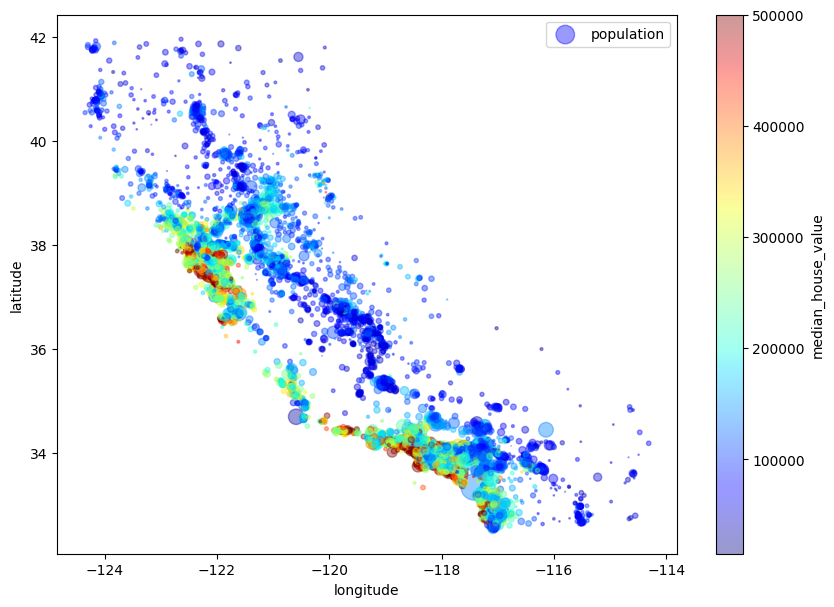

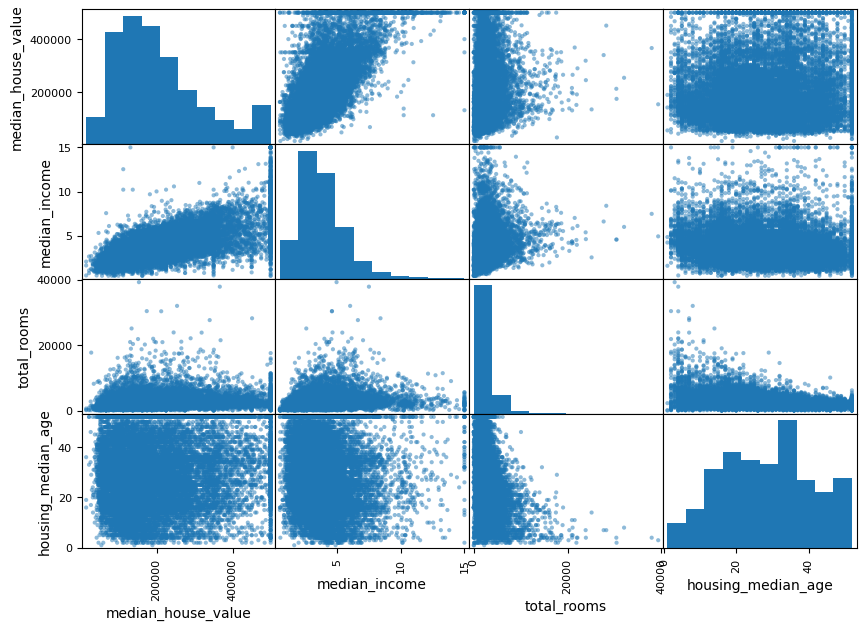

In [3]:
housing = strat_trainset.copy()
#we want to visualize our data more vividly , therefore now we will change the radius of these circular points according to the density of population
# also we will                           use cmap-> jet function of matplotlib to make these points coloured according to the median house value.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)




# lets use pandas corr function to check the corelation of median house value with other attributes of hte housing data.

#now we will use scatter_matrix function of pandas to check the correlation of each numerical attribute with the other
#for such purpose we will use 4 important columns in our data , which are 
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(10,7))
#### experimenting over the attributes
housing["bedrooms_per_rooms"] = housing["total_bedrooms"]/housing["total_rooms"]
housing ["rooms_per_house"] = housing ["total_rooms"]/housing["households"]
housing["popullation_per_house"] = housing["population"]/housing ["households"]

numeric_columns = housing.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))
# now lets make final housing sets and label sets separately as out features and targets.
housing = strat_trainset.drop("median_house_value", axis=1)
housing_labels = strat_trainset["median_house_value"].copy()
# for testing purpose , might ignore.
housing_test = strat_testset.drop("median_house_value", axis=1)
housing_labels_test = strat_testset["median_house_value"].copy()

# now we will use the impute module from sklearn to deal and remove the empty cells from rooms of house attribute.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity",axis = 1)
imputer.fit(housing_num)
imputer.statistics_
imputer.transform(housing_num)
print(housing_num)










In [18]:
# now we will deal with the categorical / textual data column's in our data.
# we have the ocean_proximity columnn so we need to encode it into numerical values , so
# that we can implement our computation and algorithms on it.
# we have many type of encoders such as ordinal encoder and one hot encoder. here we will use the one hot encoder.
from sklearn.preprocessing import OneHotEncoder
housing_cat_OP = housing[["ocean_proximity"]]
#print(housing_cat_OP.head(5))
cat_encoder = OneHotEncoder()
one_hot_encoded = cat_encoder.fit_transform(housing_cat_OP)
one_hot_encoded # this variable now stores a sparse matrix of encoded data.

# now we will make pipelines , which is a feature of sklearn where you can apply a lot of transformations in sequential order
# we will also transform the numerical data by scaling it using our standard scaler/z scaling.
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
num_pipeline= Pipeline(
  [
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
  ]
)
#housing_num_tr = num_pipeline.fit_transform(housing_num)
# so a pipline is basically is a transformer which does it for various steps and sequences.
# we have a compose library in our sklearn , that allows us to perform scaling on texual and numeric data altogether.
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
  ("num",num_pipeline,num_attribs),
("cat" , OneHotEncoder() , cat_attribs),])
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared_test = full_pipeline.transform(housing_test)
# now our combined scaling of data is completed.
print(housing_prepared_test)






[[ 0.59229422 -0.71065803  0.02756357 ...  0.          0.
   0.        ]
 [-0.42180959 -0.35049119 -0.37006852 ...  0.          0.
   0.        ]
 [ 0.56232071 -0.64985064  0.5842485  ...  0.          0.
   0.        ]
 ...
 [-0.07211862 -0.56097831  1.14093342 ...  0.          0.
   0.        ]
 [ 0.83208232 -0.93985512  0.10708999 ...  0.          0.
   0.        ]
 [ 0.50736927 -0.67791559  0.5842485  ...  0.          0.
   0.        ]]


In [19]:
#training model 
# trying linear regresssion first ->
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
housing_prepared_pd = pd.DataFrame(housing_prepared)
some_data = housing_prepared_pd.iloc[:5]
some_labels = housing_labels.iloc[:5]
print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))
# using rmse metrics lets check its accuracy.
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared_test)
lin_mse = mean_squared_error(housing_labels_test, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse) 



Predictions: [ 87710.9184376  312666.78080576 148193.92872405 181973.84391033
 242269.47566914]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]
67238.68522644627


here RMSE = 68866.78550087014 which is very high , clearly the linear model underfits out data and shows a error of 68866.78550087014 in each value of median pricing


In [20]:
# lets try another model => decision tree regressor
from sklearn.tree import DecisionTreeRegressor
des_tree = DecisionTreeRegressor()
housing_prepared_pd_test = pd.DataFrame(housing_prepared_test)
des_tree.fit(housing_prepared, housing_labels)
print(des_tree.predict(housing_prepared_test))
print(list(housing_labels_test))
from sklearn.metrics import mean_squared_error
housing_predictions = des_tree.predict(housing_prepared_test)
des_reg_mse = mean_squared_error(housing_labels_test, housing_predictions)
des_reg_rmse = np.sqrt(des_reg_mse)
print(des_reg_rmse) 
# in general we do not touch out test set untill we are certain about out model.
# here we used test set for testing because it wont cause any diffrence as out model is not actively learing 
# and is onnly the test set examples for making predictions.
#instead of using the test set each time , we generally use sklearn's cross validation. and keep test set till last complete predictions.



[500001. 158000. 216000. ... 443600. 325400. 184800.]
[500001.0, 162500.0, 204600.0, 159700.0, 184000.0, 151900.0, 104900.0, 500001.0, 367400.0, 346500.0, 337000.0, 59200.0, 212500.0, 274600.0, 227100.0, 115800.0, 97600.0, 85500.0, 337400.0, 366200.0, 219700.0, 279900.0, 230800.0, 59100.0, 89300.0, 67200.0, 293800.0, 162100.0, 91700.0, 145600.0, 175900.0, 116300.0, 167900.0, 96600.0, 60800.0, 411900.0, 135300.0, 235500.0, 80600.0, 318800.0, 171900.0, 338600.0, 195200.0, 267700.0, 228900.0, 163900.0, 75000.0, 153100.0, 95300.0, 325700.0, 66300.0, 93800.0, 350000.0, 248900.0, 500001.0, 170100.0, 346800.0, 208000.0, 435700.0, 164400.0, 142600.0, 500001.0, 294100.0, 349600.0, 209200.0, 147200.0, 55000.0, 180800.0, 162900.0, 397000.0, 373400.0, 255900.0, 193700.0, 149700.0, 421600.0, 174800.0, 154200.0, 178400.0, 185400.0, 51600.0, 150400.0, 279900.0, 182100.0, 73100.0, 331500.0, 361900.0, 238300.0, 169800.0, 500001.0, 213000.0, 84800.0, 290000.0, 180000.0, 97200.0, 73800.0, 150700.0, 12800

In [7]:
# testing model using cross validation of sklearn
from sklearn.model_selection import cross_val_score
scores = cross_val_score(des_tree,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv = 10)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
  print("scores:",scores)
  print("Mean:",scores.mean())
  print("Standard deviation",scores.std())
display_scores(tree_rmse_scores)
scores1 = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv = 10)
lin_rmse_scores = np.sqrt(-scores1)
display_scores(lin_rmse_scores)
# clearly form both cross validation and testset actual score check , decision trees performs way worse then linear model.

scores: [72297.58594235 71421.46853855 64877.2828133  69982.88253401
 69192.49635142 69778.32266226 74288.86252091 69430.49345899
 66184.11286829 69754.9703791 ]
Mean: 69720.8478069179
Standard deviation 2584.640311672581
scores: [72098.22665202 65263.25382431 67474.73970669 69344.34356573
 66405.23454953 72763.65486499 70271.51498924 69326.8790595
 66674.88791569 70584.58383018]
Mean: 69020.731895787
Standard deviation 2377.8463322927073


In [10]:
# finally we will try the random forest regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
scores2 = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv = 10)
forest_rmse_scores = np.sqrt(-scores2)
display_scores(forest_rmse_scores)






scores: [50223.10230465 49249.34790072 46114.95264608 50553.91450384
 47733.30857617 49525.0862443  51854.56244144 48944.17077041
 47492.69608837 53087.71157159]
Mean: 49477.885304758325
Standard deviation 1975.4942630757726


In [11]:
#saving my trained models.
import joblib
joblib.dump(forest_reg,"forest_reg.pkl")
joblib.dump(lin_reg,"lin_reg.pkl")
joblib.dump(des_tree,"des_tree.pkl")



['des_tree.pkl']

In [13]:
# to fine tune our model.
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = joblib.load("forest_reg.pkl")
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_estimator_


RandomForestRegressor(max_features=8, n_estimators=30)

In [27]:
# final evaluation on the test set.
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(housing_prepared_test)
#checking performance.
final_mse = mean_squared_error(housing_labels_test,final_predictions)
final_rmse = np.sqrt(final_mse)
print("rmse value error : ",final_rmse)
from sklearn.metrics import r2_score
r2 = r2_score(housing_labels_test, final_predictions)
r2_percentage = r2 * 100
print("An R-squared value percentage of :",r2_percentage,"%")
# hense a good model is generated with a r squared value of around 82 percent.





rmse value error :  48100.394269148856
An R-squared value percentage of : 82.24797610379628 %
